In [4]:
import pandas as pd

# Dateien laden
umsatzdaten = pd.read_csv('0_DataPreparation/umsatzdaten_gekuerzt.csv')
wetterdaten = pd.read_csv('0_DataPreparation/wetter.csv')
kiwo_daten = pd.read_csv('0_DataPreparation/kiwo.csv')

# Erster Blick auf die Daten
print("Umsatzdaten:")
print(umsatzdaten.head())
print("\nWetterdaten:")
print(wetterdaten.head())
print("\nKIWO Daten:")
print(kiwo_daten.head())


Umsatzdaten:
        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754

Wetterdaten:
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0

KIWO Daten:
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1


In [9]:
# Daten bereinigen und vorbereiten
umsatzdaten['Datum'] = pd.to_datetime(umsatzdaten['Datum'])
umsatzdaten['Monat'] = umsatzdaten['Datum'].dt.month
umsatzdaten['Wochentag'] = umsatzdaten['Datum'].dt.weekday
umsatzdaten['Tag'] = umsatzdaten['Datum'].dt.day

wetterdaten['Datum'] = pd.to_datetime(wetterdaten['Datum'])
kiwo_daten['Datum'] = pd.to_datetime(kiwo_daten['Datum'])

# Daten zusammenführen
gesamt_daten = umsatzdaten.merge(wetterdaten, on='Datum', how='left')
gesamt_daten = gesamt_daten.merge(kiwo_daten, on='Datum', how='left')

# Fehlende Werte imputieren (einfacher Ansatz)
gesamt_daten.fillna(gesamt_daten.mean(), inplace=True)

# Features und Zielvariable
X = gesamt_daten.drop(['Datum', 'Umsatz'], axis=1)
y = gesamt_daten['Umsatz']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalierung der Daten
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Zielvariable auf Nullwerte überprüfen und anpassen
y_train = np.where(y_train == 0, 1e-6, y_train)
y_test = np.where(y_test == 0, 1e-6, y_test)

# Benutzerdefinierte Verlustfunktion für MAPE
def custom_mape(y_true, y_pred):
    y_true = tf.where(y_true == 0, 1e-6, y_true)
    return tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100

# Neuronales Netz Modell
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Modell kompilieren mit der benutzerdefinierten Verlustfunktion
model.compile(optimizer='adam', loss=custom_mape)

# Training des Modells
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluierung des Modells
mape = model.evaluate(X_test, y_test)
print(f'MAPE: {mape}')

Epoch 1/100


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 93.4859 - val_loss: 50.0256
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50.0798 - val_loss: 47.2902
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 48.1306 - val_loss: 46.9423
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47.8718 - val_loss: 46.8560
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47.4361 - val_loss: 46.7371
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46.7938 - val_loss: 46.6370
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46.7583 - val_loss: 46.5005
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47.0829 - val_loss: 46.4962
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.1509 - val_loss: 46.4307
Epoch 10/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 46.7853 - val_loss: 46.4397
Epoch 11/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47.1840 - val_loss: 46.3822
Epoch 12/100
187/187 ━━━━━━━━

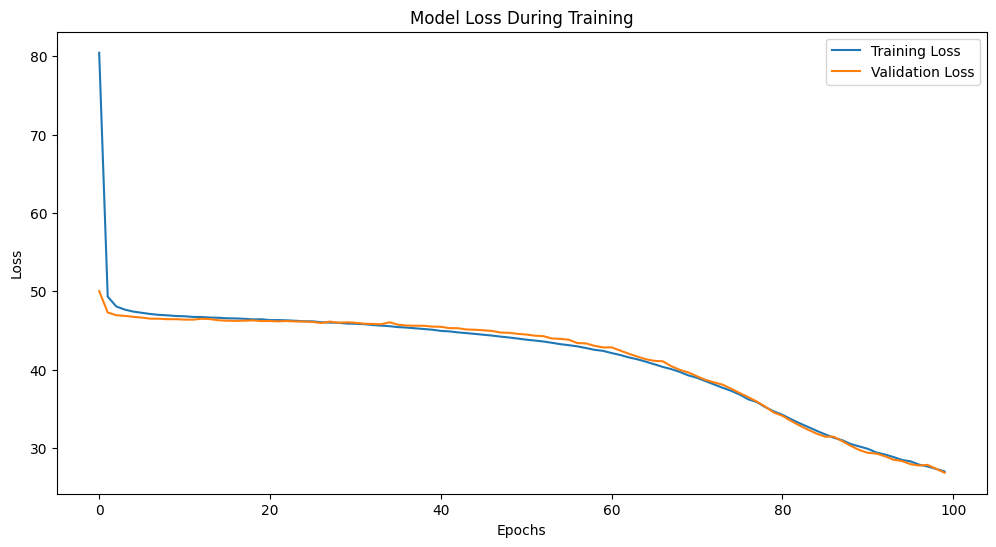

In [10]:
# Training history plotten
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()